In [1]:
import pandas as pd
import numpy  as np

In [2]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-03-04 14:17:38--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 131.224.250.75, 2001:610:430:ffff::16:198
Connecting to data.rivm.nl (data.rivm.nl)|131.224.250.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97091007 (93M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>]  92.59M  7.08MB/s    in 13s     

2021-03-04 14:17:52 (6.87 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [97091007/97091007]



In [3]:
df_case = pd.read_csv(
    'COVID-19_casus_landelijk.csv',
    sep=';',
    parse_dates=[0, 1],
    infer_datetime_format=True)

df_case.tail(10)

Date_file Date_statistics Date_statistics_type Agegroup  \
1101420 2021-03-03 10:00:00      2021-03-03                  DON    40-49   
1101421 2021-03-03 10:00:00      2021-03-03                  DON    70-79   
1101422 2021-03-03 10:00:00      2021-03-03                  DPL    60-69   
1101423 2021-03-03 10:00:00      2021-03-03                  DPL    30-39   
1101424 2021-03-03 10:00:00      2021-03-03                  DPL    30-39   
1101425 2021-03-03 10:00:00      2021-03-03                  DPL    40-49   
1101426 2021-03-03 10:00:00      2021-03-03                  DON    20-29   
1101427 2021-03-03 10:00:00      2021-03-03                  DPL    20-29   
1101428 2021-03-03 10:00:00      2021-03-03                  DON    80-89   
1101429 2021-03-03 10:00:00      2021-03-03                  DPL    10-19   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1101420  Female     Gelderland            Unknown  Unknown            NaN   
1101421  Female   Zuid-Holland            Unknown  Unknown            NaN   
1101422  Female  Noord-Holland            Unknown  Unknown            NaN   
1101423  Female   Zuid-Holland            Unknown  Unknown            NaN   
1101424    Male  Noord-Holland            Unknown  Unknown            NaN   
1101425    Male  Noord-Holland            Unknown  Unknown            NaN   
1101426  Female   Zuid-Holland            Unknown  Unknown            NaN   
1101427  Female  Noord-Holland            Unknown  Unknown            NaN   
1101428  Female      Groningen            Unknown  Unknown            NaN   
1101429  Female        Utrecht            Unknown  Unknown            NaN   

              Municipal_health_service  
1101420            GGD Gelderland-Zuid  
1101421            GGD Hollands-Midden  
1101422               GGD Kennemerland  
1101423  Dienst Gezondheid & Jeugd ZHZ  
1101424               GGD Kennemerland  
1101425                  GGD Amsterdam  
1101426            GGD Hollands-Midden  
1101427                  GGD Amsterdam  
1101428                  GGD Groningen  
1101429              GGD Regio Utrecht

In [4]:
# Define period labels
df_case['period'] = df_case['Date_statistics'].dt.isocalendar().year * 100 + df_case['Date_statistics'].dt.isocalendar().week
df_case['period'] = df_case['period'].apply(str)
df_case['period'] = df_case['period'].apply(lambda x: x[:4] + 'W' + x[4:])

#df_case['period'] = (pd.to_datetime('20191230') + pd.to_timedelta((df_case['Date_statistics'].dt.week - 1) * 7, unit='days')).dt.date

# Define group labels
df_case['groups'] = df_case['Sex'] + ' ' + df_case['Agegroup']

df_case.tail(10)

Date_file Date_statistics Date_statistics_type Agegroup  \
1101420 2021-03-03 10:00:00      2021-03-03                  DON    40-49   
1101421 2021-03-03 10:00:00      2021-03-03                  DON    70-79   
1101422 2021-03-03 10:00:00      2021-03-03                  DPL    60-69   
1101423 2021-03-03 10:00:00      2021-03-03                  DPL    30-39   
1101424 2021-03-03 10:00:00      2021-03-03                  DPL    30-39   
1101425 2021-03-03 10:00:00      2021-03-03                  DPL    40-49   
1101426 2021-03-03 10:00:00      2021-03-03                  DON    20-29   
1101427 2021-03-03 10:00:00      2021-03-03                  DPL    20-29   
1101428 2021-03-03 10:00:00      2021-03-03                  DON    80-89   
1101429 2021-03-03 10:00:00      2021-03-03                  DPL    10-19   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1101420  Female     Gelderland            Unknown  Unknown            NaN   
1101421  Female   Zuid-Holland            Unknown  Unknown            NaN   
1101422  Female  Noord-Holland            Unknown  Unknown            NaN   
1101423  Female   Zuid-Holland            Unknown  Unknown            NaN   
1101424    Male  Noord-Holland            Unknown  Unknown            NaN   
1101425    Male  Noord-Holland            Unknown  Unknown            NaN   
1101426  Female   Zuid-Holland            Unknown  Unknown            NaN   
1101427  Female  Noord-Holland            Unknown  Unknown            NaN   
1101428  Female      Groningen            Unknown  Unknown            NaN   
1101429  Female        Utrecht            Unknown  Unknown            NaN   

              Municipal_health_service   period        groups  
1101420            GGD Gelderland-Zuid  2021W09  Female 40-49  
1101421            GGD Hollands-Midden  2021W09  Female 70-79  
1101422               GGD Kennemerland  2021W09  Female 60-69  
1101423  Dienst Gezondheid & Jeugd ZHZ  2021W09  Female 30-39  
1101424               GGD Kennemerland  2021W09    Male 30-39  
1101425                  GGD Amsterdam  2021W09    Male 40-49  
1101426            GGD Hollands-Midden  2021W09  Female 20-29  
1101427                  GGD Amsterdam  2021W09  Female 20-29  
1101428                  GGD Groningen  2021W09  Female 80-89  
1101429              GGD Regio Utrecht  2021W09  Female 10-19

In [5]:
# Pivot to period rows with group columns
df_heat = df_case[df_case['Municipal_health_service'] != ''].pivot_table(
    index='period',
    columns='groups',
    values='Date_statistics',
    aggfunc='count').fillna(0)

# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = df_heat[df_heat.columns[0:24]].sum(axis=1)
df_heat = df_heat[df_heat.columns[0:24]]#.loc['2020W26':]#.div(df_heat['total'], axis='index')

# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()

df_heat.tail(5).loc[::-1].transpose()

period          2021W09  2021W08  2021W07  2021W06  2021W05
groups                                                     
Female 0-9        203.0    877.0    851.0    538.0    506.0
Female 10-19      353.0   1768.0   1658.0   1318.0   1292.0
Female 20-29      424.0   2235.0   2484.0   2065.0   2176.0
Female 30-39      344.0   2101.0   2399.0   1793.0   1768.0
Female 40-49      326.0   1923.0   2155.0   1722.0   1842.0
Female 50-59      366.0   1986.0   2550.0   2196.0   2309.0
Female 60-69      202.0   1150.0   1484.0   1305.0   1318.0
Female 70-79      127.0    704.0    893.0    760.0    787.0
Female 80-89       71.0    457.0    604.0    724.0    798.0
Female 90+         18.0    167.0    227.0    270.0    333.0
Female <50          0.0      0.0      0.0      1.0      1.0
Female Unknown      0.0      0.0      0.0      0.0      0.0
Male 0-9          203.0    925.0    913.0    587.0    520.0
Male 10-19        341.0   1694.0   1673.0   1281.0   1255.0
Male 20-29        399.0   2157.0   2298.0   1940.0   1844.0
Male 30-39        358.0   1826.0   2152.0   1706.0   1755.0
Male 40-49        336.0   1840.0   2030.0   1607.0   1671.0
Male 50-59        386.0   2054.0   2480.0   2220.0   2184.0
Male 60-69        213.0   1309.0   1592.0   1336.0   1513.0
Male 70-79        142.0    662.0    841.0    747.0    777.0
Male 80-89         52.0    307.0    446.0    440.0    460.0
Male 90+            8.0     68.0     77.0     95.0    122.0
Male <50            0.0      0.0      0.0      1.0      0.0
Male Unknown        0.0      0.0      0.0      0.0      0.0

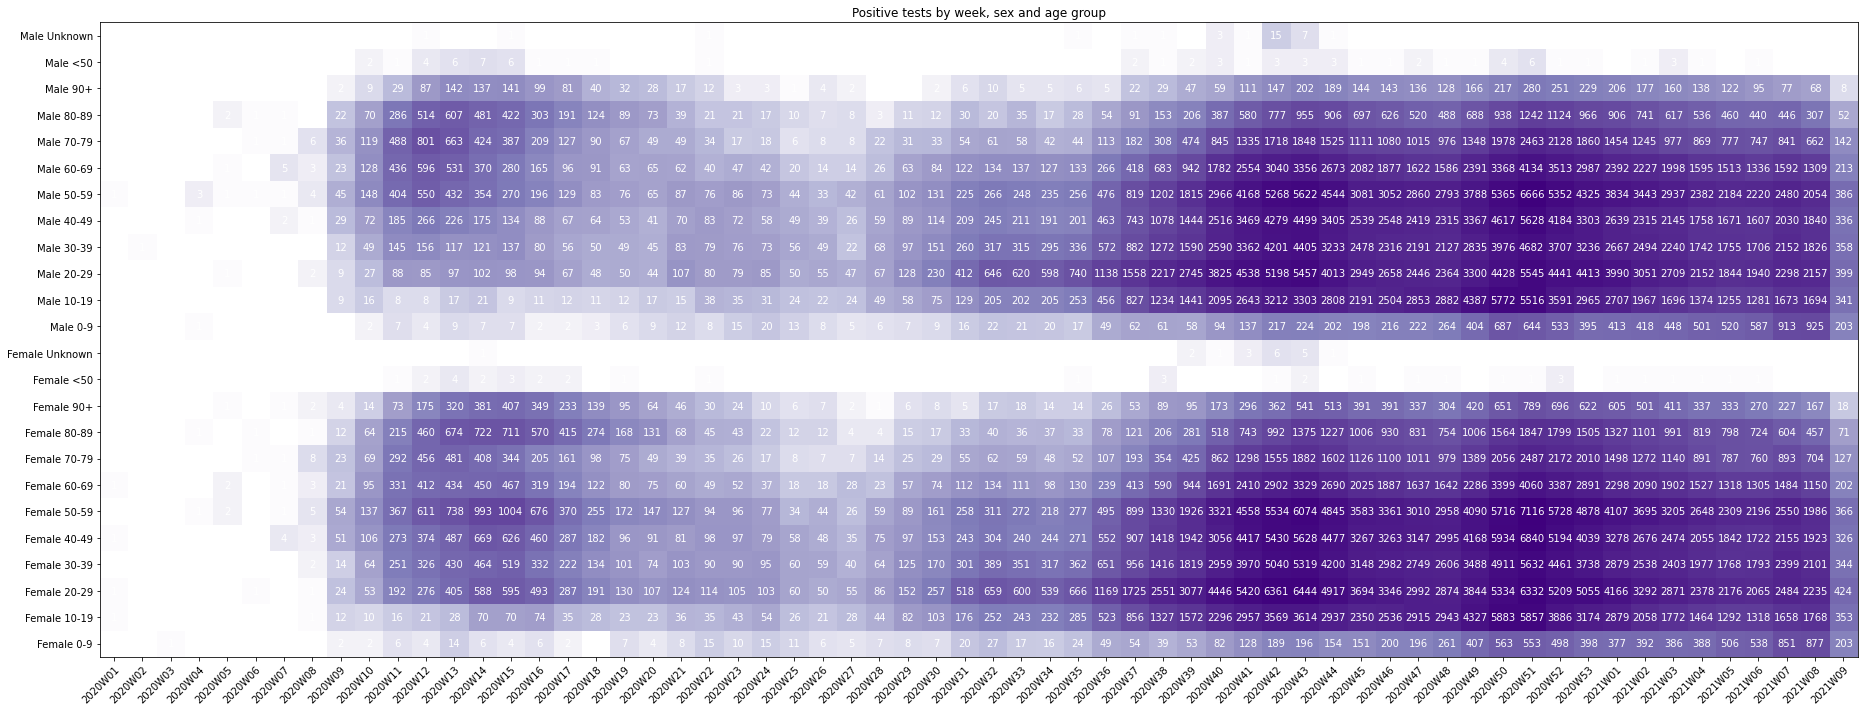

In [6]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(figsize=(26, 10))

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(df_heat[df_heat > 0].loc[:].transpose()),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower')

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor")

# Convert dataframe to numpy format
np_heat = df_heat.to_numpy()

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i,
            j,
            int(np_heat[i, j]),
            ha="center",
            va="center",
            color="w")

ax.set_title("Positive tests by week, sex and age group")
fig.tight_layout()
plt.show()